In [88]:
library(Seurat)
library(data.table)
library(ggplot2)
library(flexclust)

# analysis

In [89]:
datasetName="/stor/public/hcad/lung_lung_HCLAdultLung1/lung_lung_HCLAdultLung1"

In [3]:
# scRNA
raw_data <- read.csv(paste0(datasetName, "_expression.tsv.gz"),header = TRUE, sep='\t',row.names = 1)

In [5]:
# Load the metadata and annotation
data.metadata <- read.table(file = paste0(datasetName,"_metadata.tsv.gz"), h = T, sep = "\t", row.names = 5)
data.annotation <- read.table(file = paste0(datasetName,"_annotation.tsv.gz"), h = T, sep = "\t", row.names = 1)

In [6]:
# build object
dataobj <- CreateSeuratObject(counts = raw_data, project = "HCAd",meta.data = data.metadata)
dataobj <- AddMetaData(dataobj, metadata = data.annotation)

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”

In [7]:
dataobj <- NormalizeData(dataobj, normalization.method = "LogNormalize", scale.factor = 10000)
dataobj <- FindVariableFeatures(dataobj) # default feature number, nfeatures = 2000
dataobj <- ScaleData(dataobj, features = VariableFeatures(dataobj))

Centering and scaling data matrix


In [8]:
dataobj <- RunPCA(dataobj, features = VariableFeatures(object = dataobj))

PC_ 1 
Positive:  FTH1, HLA-DRA, LYZ, FTL, CD74, HLA-DRB1, FCER1G, TYROBP, LAPTM5, C1QB 
	   C1QA, MRC1, LCP1, ALOX5AP, CTSS, C1QC, AIF1, FABP4, MCEMP1, CD52 
	   CCL18, TMSB4X, HLA-DQB1, APOC1, CD163, MSR1, CTSB, HLA-DQA1, VSIG4, FOLR3 
Negative:  SFTPB, SFTPC, SFTPA1, SFTPA2, NAPSA, SLPI, KRT19, CXCL17, EMP2, AGR2 
	   SCD, FASN, AGR3, AQP4, PIGR, WIF1, KRT8, LMO7, MALAT1, KRT18 
	   KRT7, S100A14, SCGB3A2, GPRC5A, AGER, C1orf116, GKN2, CRTAC1, FOLR1, CEACAM6 
PC_ 2 
Positive:  A2M, MGP, DCN, SPARC, LUM, MFAP4, ADH1B, IGFBP7, FN1, VWF 
	   COL1A2, PTGDS, TMSB10, C7, B2M, RARRES2, TIMP1, PRSS23, CLU, TMEM100 
	   CALCRL, ENG, FBLN1, FCN3, CALD1, SLCO2A1, COL3A1, FHL1, CCL2, COL6A3 
Negative:  SFTPB, SFTPC, SFTPA1, SFTPA2, NAPSA, SCD, SLPI, CXCL17, SERPINA1, AGR2 
	   FASN, KRT19, MSMO1, AGR3, KRT8, PIGR, AQP4, WIF1, PGC, S100A14 
	   GKN2, CRTAC1, SCGB3A2, FOLR1, C1orf116, KRT7, FBP1, MALAT1, HMGCS1, AQP3 
PC_ 3 
Positive:  CXCL8, GPR183, SOD2, SAMSN1, IL1B, C5AR1, FCN1, G0S2, EREG, B

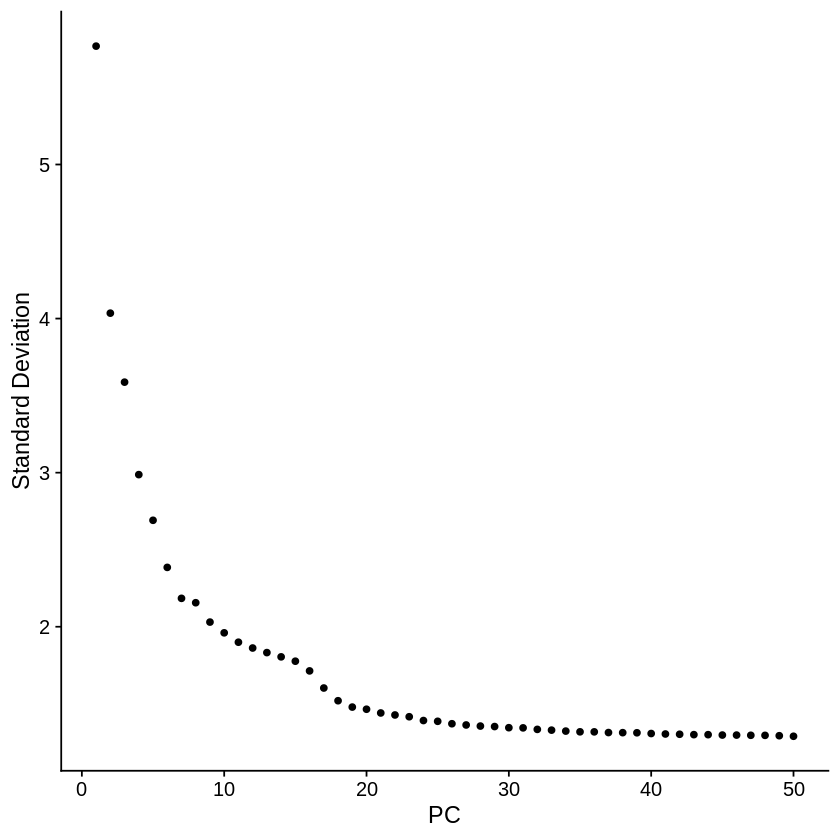

In [9]:
ElbowPlot(dataobj,50) 

In [10]:
pcDim = 30
dataobj <- RunUMAP(dataobj, dims = 1:pcDim)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”18:53:10 UMAP embedding parameters a = 0.9922 b = 1.112
18:53:10 Read 8426 rows and found 30 numeric columns
18:53:10 Using Annoy for neighbor search, n_neighbors = 30
18:53:10 Building Annoy index with metric = cosine, n_trees = 50
0%   10   20   30   40   50   60   70   80   90   100%
[----|----|----|----|----|----|----|----|----|----|
**************************************************|
18:53:12 Writing NN index file to temp file /tmp/RtmpFmgyr5/file59bd34a34304
18:53:12 Searching Annoy index using 1 thread, search_k = 3000
18:53:15 Annoy recall = 100%
18:53:16 Commencing smooth kNN distance calibration using 1 thread
18:53:16 Initializing from normalized Laplacian + noise
18:53:17 Commencing optimizatio

In [93]:
p_umap2 <- DimPlot(dataobj, reduction = "umap", label = TRUE, group.by = "cell_cluster", pt.size=1) + NoLegend()
ggsave(paste0(datasetName,".seurat.umap_orig.tiff"), plot = p_umap2, width = 8, height = 5)

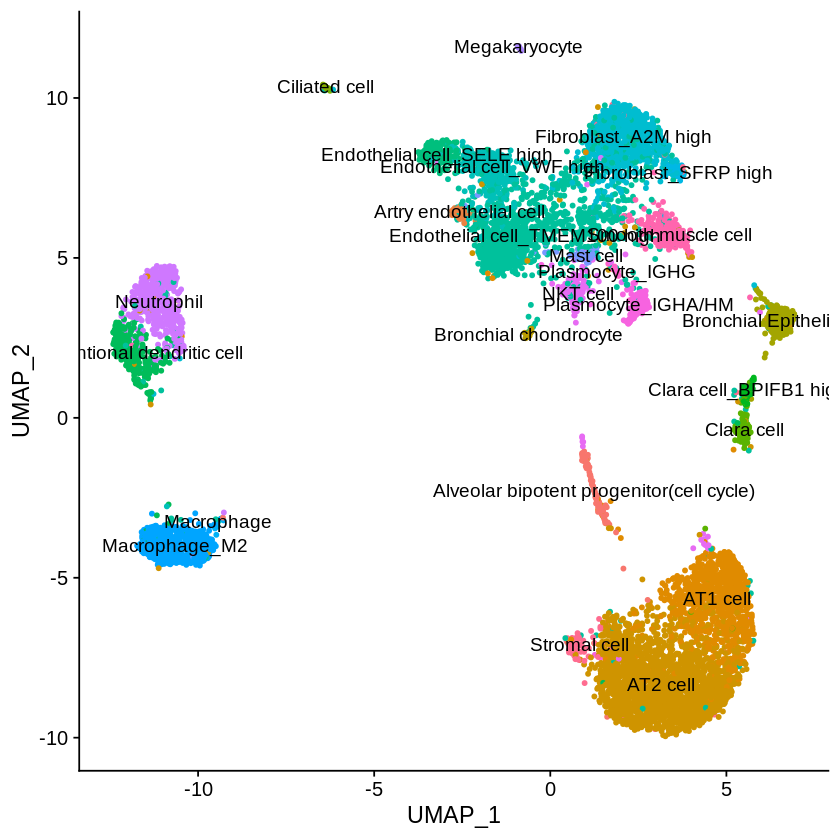

In [94]:
p_umap2

# Clustering

In [13]:
dataobj <- FindNeighbors(dataobj, reduction = "pca", dims = 1:pcDim, nn.eps = 0.5)

Computing nearest neighbor graph
Computing SNN


In [19]:
dataobj <- FindClusters(dataobj, resolution = 1.5, n.start = 10)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 8426
Number of edges: 366897

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8031
Number of communities: 23
Elapsed time: 1 seconds


In [91]:
p_umap <- DimPlot(dataobj, reduction = "umap", label = TRUE, pt.size=1)
ggsave(paste0(datasetName,".seurat.umap.tiff"), plot = p_umap, width = 8, height = 5)

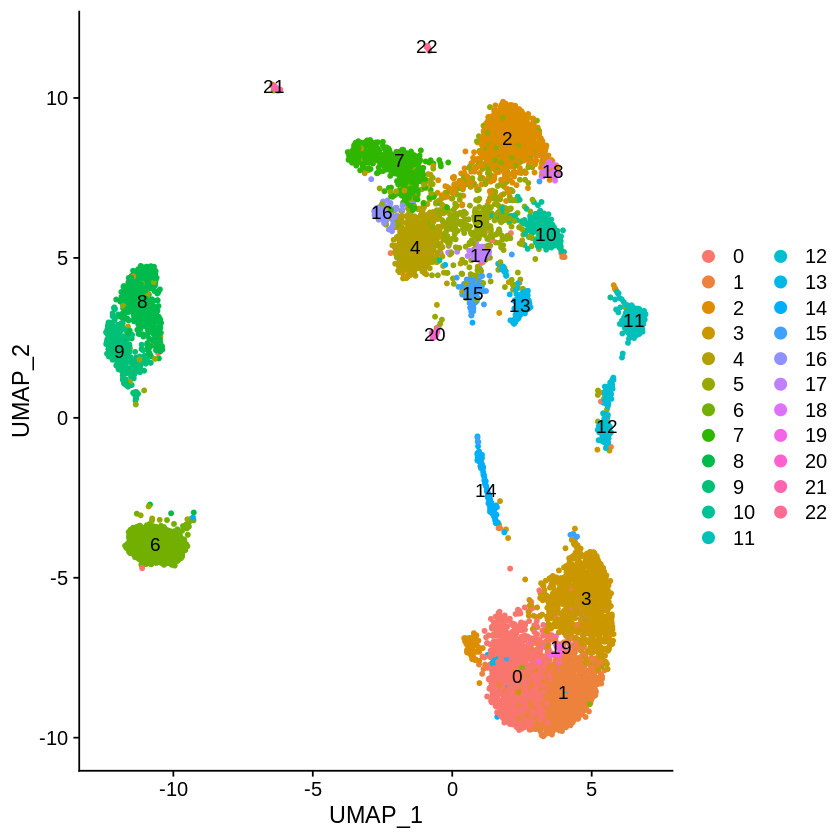

In [92]:
p_umap

# Finding cluster markers 

In [ ]:
dataobj.markers <- FindAllMarkers(dataobj, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)
write.table(dataobj.markers, file = paste0(datasetName,".seurat.markers.txt"), sep = "\t", quote = F, row.names = F, col.names = T)

saveRDS(dataobj, file = paste0(datasetName,".seuratobj.rds"))

Calculating cluster 0
Calculating cluster 1
Calculating cluster 2
Calculating cluster 3
Calculating cluster 4
Calculating cluster 5
Calculating cluster 6
Calculating cluster 7
Calculating cluster 8
Calculating cluster 9
Calculating cluster 10
Calculating cluster 11
Calculating cluster 12
Calculating cluster 13
Calculating cluster 14
Calculating cluster 15
Calculating cluster 16
Calculating cluster 17
Calculating cluster 18
Calculating cluster 19
Calculating cluster 20
Calculating cluster 21
Calculating cluster 22


# Annotation

In [90]:
dataobj <- readRDS(paste0(datasetName,".seuratobj.rds"))

In [97]:
dataobj.markers <- read.table(paste0(datasetName,".seurat.markers.txt"), sep = "\t", h = T)


In [166]:
dataobj.markers[dataobj.markers['cluster']==22,]

,p_val,avg_logFC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<fct>
2129,0.000000e+00,4.232902,0.688,0.004,0.000000e+00,22,ACRBP
2130,0.000000e+00,3.746096,0.812,0.004,0.000000e+00,22,PF4
2131,0.000000e+00,3.213978,0.688,0.001,0.000000e+00,22,TUBB1
2132,0.000000e+00,2.780054,0.562,0.000,0.000000e+00,22,ITGA2B
2133,0.000000e+00,2.759660,0.312,0.000,0.000000e+00,22,TMEM40
2134,0.000000e+00,2.753661,0.625,0.001,0.000000e+00,22,GP9
2135,0.000000e+00,2.523107,0.562,0.000,0.000000e+00,22,CLEC1B
2136,0.000000e+00,2.313224,0.438,0.001,0.000000e+00,22,CMTM5
2137,0.000000e+00,2.284439,0.312,0.000,0.000000e+00,22,ALOX12


In [168]:
dataobj.markers[dataobj.markers['gene']=='PF4',]

,p_val,avg_logFC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<fct>
2130,0,3.746096,0.812,0.004,0,22,PF4


In [170]:
new.cluster.ids <- c('Lung-Epithelial Tissue-Type II alveolar cell-SFTPC SFTPD',#0
                     'Lung-Epithelial Tissue-Type II alveolar cell-SFTPC SFTPD',
                     'Lung-Connective Tissue-Fibrocyte-DCN LUM',
                     'Lung-Epithelial Tissue-Type I alveolar cell-AGER SFTPC',
                     'Lung-Epithelial Tissue-Endothelial cell-PODXL IFI27',
                     'Lung-Connective Tissue-Fibrocyte-DCN LUM',#5
                     'Lung-Connective Tissue-Macrophage-APOC1 FCGR3A',
                     'Lung-Epithelial Tissue-Vascular endothelial cell-ACKR1',#7
                     'Lung-Connective Tissue-Neutrophilic granulocyte-S100A8 S100A9',
                     'Lung-Connective Tissue-Dendritic cell-IL1B HLA-DRA',
                     'Lung-Musle Tissue-Smooth muscle cell-ACTA2 MYL9',#10
                     'Lung-Epithelial Tissue-Perineural epithelial cell-CXCL1 KRT19',
                     'Lung-Epithelial Tissue-Club cell-SCGB3A2',
                     'Lung-Connective Tissue-B cell-MZB1 JCHAIN',
                     'Lung-Connective Tissue-NK cell-TOP2A CDK1',
                     'Lung-Connective Tissue-NK cell-NKG7 CCL5',#15
                     'Lung-Epithelial Tissue-Vascular endothelial cell-GJA5 ',
                     'Lung-Connective Tissue-T cell-CD69',
                     'Lung-Connective Tissue-Fibrocyte-DCN LUM',
                     'Lung-Epithelial Tissue-Type II alveolar cell-SFTPC SFTPD',
                     'Lung-Cartiage tissue-Chondrocyte-CYTL1 CHAD',#20
                     'Lung-Epithelial Tissue-Ciliated columnar cell-RSPH1 C11orf88',
                     'Lung-Connective Tissue-Megakaryocyte-ACRBP PF4'
                     )

In [171]:
names(new.cluster.ids) <- levels(dataobj)
dataobj <- RenameIdents(dataobj, new.cluster.ids)
plot <- DimPlot(dataobj, reduction = "umap",label = TRUE, pt.size = 1) + NoLegend()

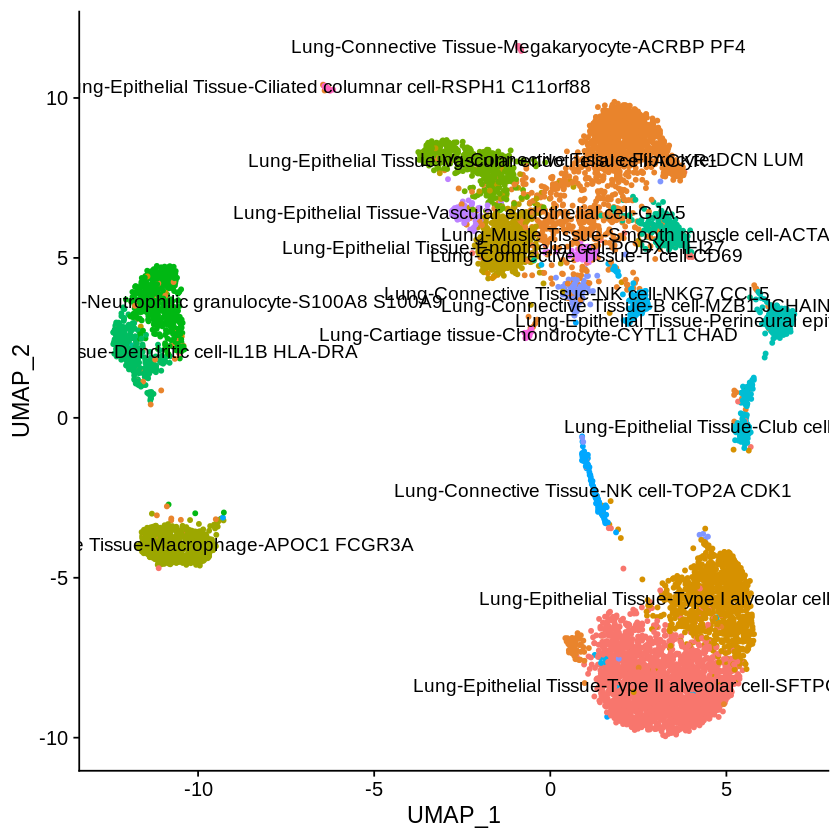

In [172]:
plot

In [173]:
ggsave(paste0(datasetName,".seurat.umap_hcad.tiff"), plot = plot, width = 8, height = 5)

In [174]:
dataobj@meta.data$hcad.label <- Idents(dataobj)

In [175]:
saveRDS(dataobj, file = paste0(datasetName,".seuratobj.rds"))

In [176]:
df_hca <- data.frame(rownames(dataobj@meta.data),dataobj@meta.data$hcad.label)
colnames(df_hca) <- c('cell_ID', 'cell_cluster')

In [177]:
write.table(df_hca, file = paste0(datasetName,"_annotation.hcad.tsv"), sep = "\t", quote = F, row.names = F, col.names = T)